In [26]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [5]:
df=pd.read_csv('DoctorVisits - DA.csv')
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


DROP UNAMED COLUMNS

In [9]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [10]:
df.head()

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [11]:
df['visits'].value_counts()

0    4141
1     782
2     174
3      30
4      24
7      12
6      12
5       9
8       5
9       1
Name: visits, dtype: int64

In [12]:
df['visits'].describe()

count    5190.000000
mean        0.301734
std         0.798134
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: visits, dtype: float64

In [13]:
df['gender'].value_counts()

female    2702
male      2488
Name: gender, dtype: int64

In [14]:
df['age'].value_counts()

0.22    1213
0.72     822
0.19     752
0.27     523
0.62     316
0.67     315
0.32     301
0.57     273
0.52     222
0.47     181
0.37     146
0.42     126
Name: age, dtype: int64

In [15]:
df['gender'].describe()

count       5190
unique         2
top       female
freq        2702
Name: gender, dtype: object

In [16]:
df['age'].describe()

count    5190.000000
mean        0.406385
std         0.204782
min         0.190000
25%         0.220000
50%         0.320000
75%         0.620000
max         0.720000
Name: age, dtype: float64

In [17]:
df['income'].describe()

count    5190.000000
mean        0.583160
std         0.368907
min         0.000000
25%         0.250000
50%         0.550000
75%         0.900000
max         1.500000
Name: income, dtype: float64

In [32]:
df['age']=(df['age']*100)

In [31]:
df

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,19.0,0.55,1,4,1,yes,no,no,no,no
1,1,female,19.0,0.45,1,2,1,yes,no,no,no,no
2,1,male,19.0,0.90,3,0,0,no,no,no,no,no
3,1,male,19.0,0.15,1,0,0,no,no,no,no,no
4,1,male,19.0,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
5185,0,female,22.0,0.55,0,0,0,no,no,no,no,no
5186,0,male,27.0,1.30,0,0,1,no,no,no,no,no
5187,0,female,37.0,0.25,1,0,1,no,no,yes,no,no
5188,0,female,52.0,0.65,0,0,0,no,no,no,no,no


In [22]:
df['age'].describe()

count    5190.000000
mean       40.638536
std        20.478182
min        19.000000
25%        22.000000
50%        32.000000
75%        62.000000
max        72.000000
Name: age, dtype: float64

In [23]:
df['age'].value_counts()

22.0    1213
72.0     822
19.0     752
27.0     523
62.0     316
67.0     315
32.0     301
57.0     273
52.0     222
47.0     181
37.0     146
42.0     126
Name: age, dtype: int64

<AxesSubplot:>

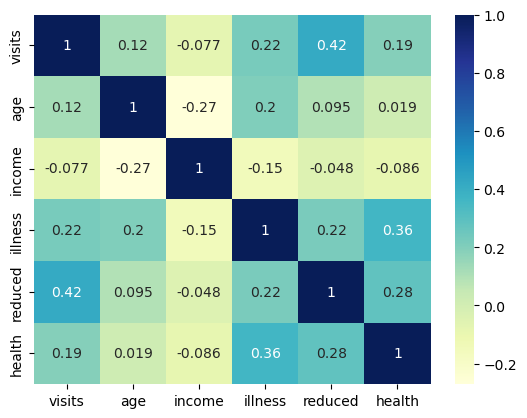

In [27]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:>

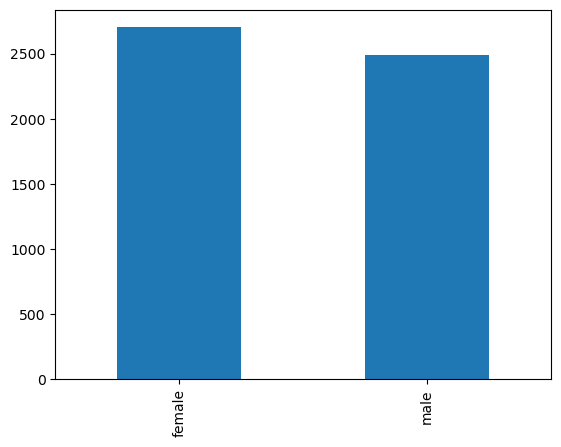

In [28]:
df['gender'].value_counts().plot(kind="bar")

<AxesSubplot:>

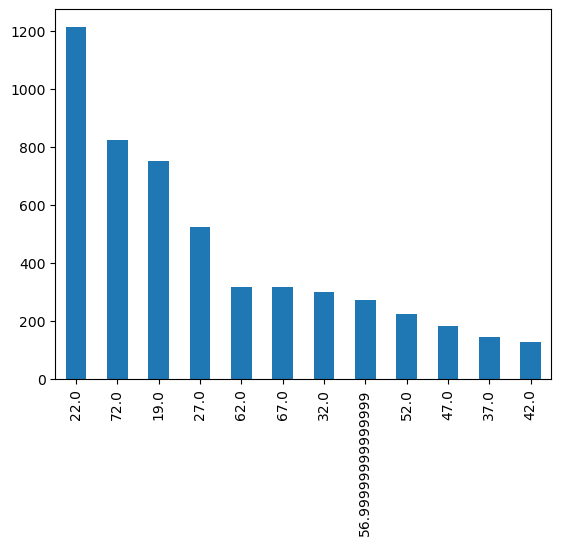

In [29]:
df['age'].value_counts().plot(kind="bar")

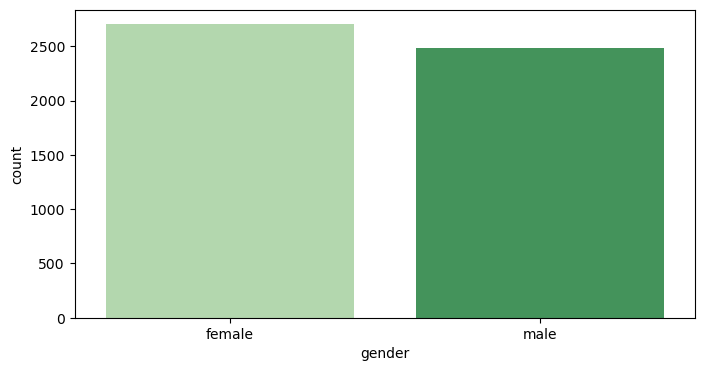

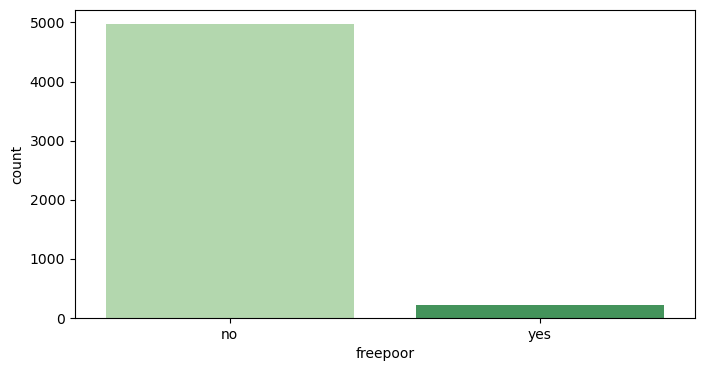

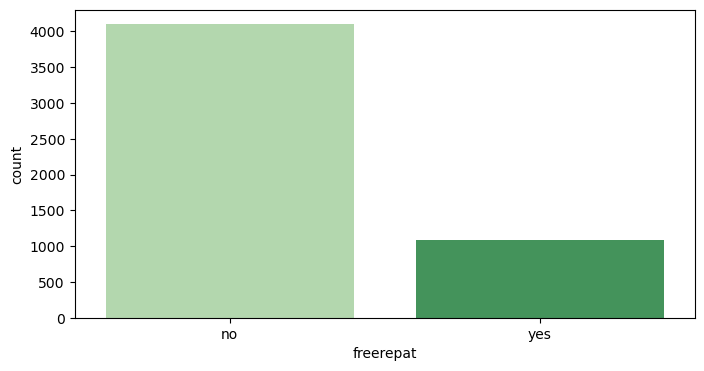

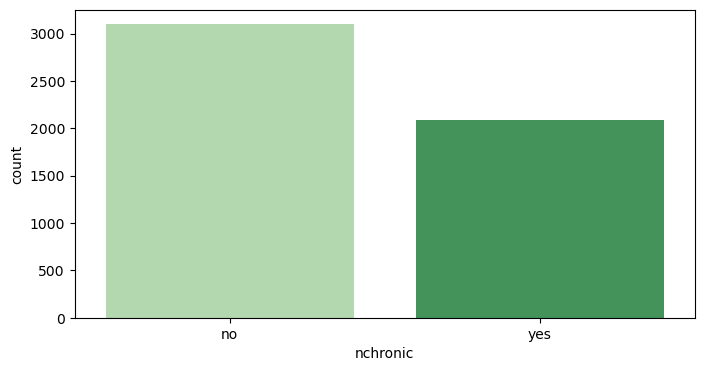

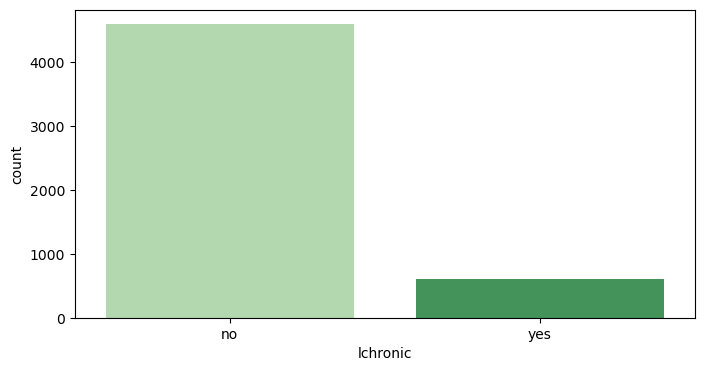

In [44]:
imp_categotical_features=df[['gender','freepoor', 'freerepat', 'nchronic','lchronic']]
for col in imp_categotical_features:
    width=8
    n=len(df[col].unique())
    if n > 15:
        width=20
        plt.figure(figsize=(width,4))
        temp=pd.DataFrame(df[col].value_counts().sort_values(ascending=False)[:35],columns=[col])
        sns.barplot(data=temp,x=temp.index,y=col,palette= 'Blues')
        plt.ylabel("count")
        plt.xlabel(col)
        plt.xticks(rotation=60) 
    else:
        plt.figure(figsize=(width,4))
        sns.countplot(data=df,x=col,palette='Greens')
    plt.show()

In [61]:
var=df.groupby(by='age').sum('income')

In [62]:
var

,visits,income,illness,reduced,health
age,,,,,
1900.0,160,314.59,938,391,892
2200.0,244,789.58,1452,743,1332
2700.0,135,443.01,595,390,623
3200.0,73,280.87,368,209,448
3700.0,36,129.57,188,181,205
4200.0,40,106.09,152,140,146
4700.0,49,135.39,238,100,205
5200.0,92,148.69,357,271,299
5700.0,109,142.83,478,290,388


array([<AxesSubplot:ylabel='visits'>, <AxesSubplot:ylabel='income'>,
       <AxesSubplot:ylabel='illness'>, <AxesSubplot:ylabel='reduced'>,
       <AxesSubplot:ylabel='health'>], dtype=object)

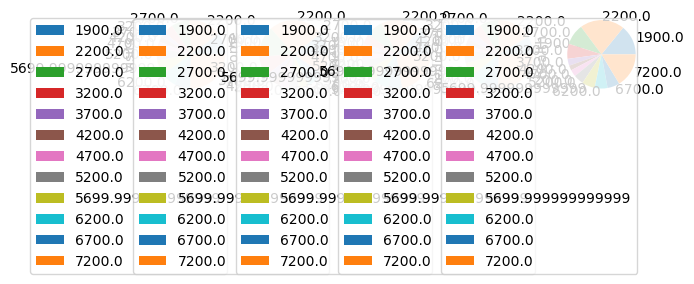

In [64]:
var.plot(kind="pie",subplots=True)

In [67]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\Santhosh\AppData\Local\Temp\ipykernel_1908\102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


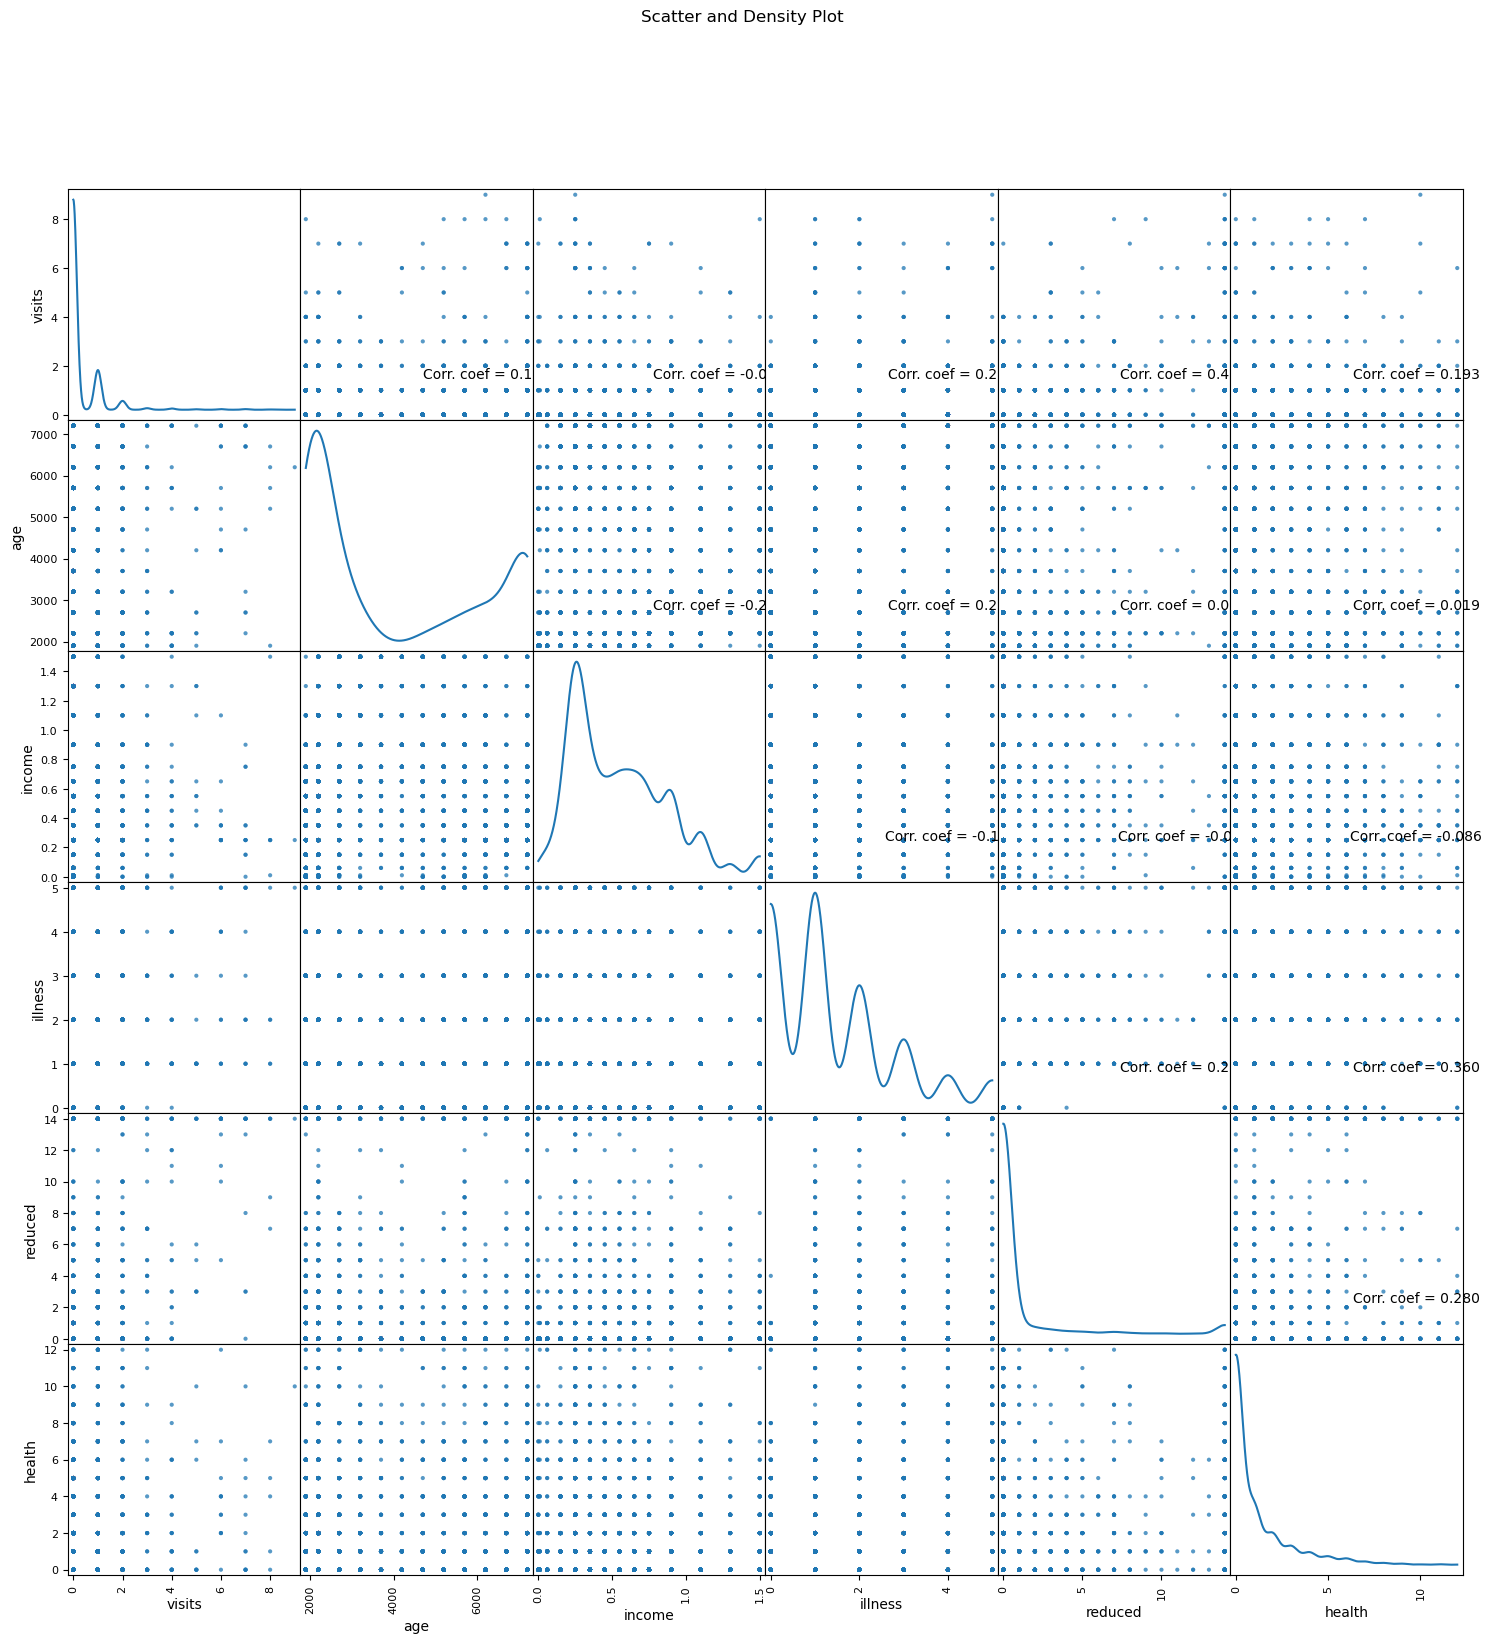

In [69]:
plotScatterMatrix(df, 18, 10)